HOMEWORK 1

Step 1: Derive the Gradient

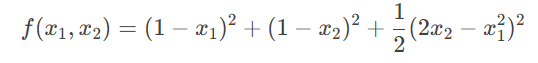
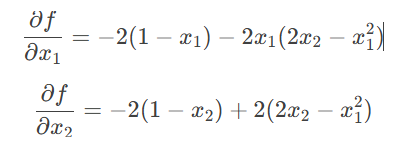

Step 2: Python Implementation

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Mendefinisi fungsi objek
def objective_function(x):
    x1, x2 = x
    term1 = (1 - x1)**2
    term2 = (1 - x2)**2
    term3 = 0.5 * (2*x2 - x1**2)**2
    return term1 + term2 + term3

# Mendefinisikan gradien dari fungsi objek
def gradient(x):
    x1, x2 = x
    df_dx1 = -2*(1 - x1) - 2*x1*(2*x2 - x1**2)
    df_dx2 = -2*(1 - x2) + 2*(2*x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Mendefinisikan fungsi Steepest Descent dengan backtracking line search
def steepest_descent(x0, alpha=1.0, max_iter=1000, tol=1e-6, c1=1e-4, c2=0.9):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    fevals = 0
    alphas = []
    
    for _ in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < tol:
            break
        
        p = -grad  # Steepest descent direction
        
        # Backtracking line search
        fx = objective_function(x)
        fevals += 1
        
        alpha_current = alpha
        while True:
            x_new = x + alpha_current * p
            fx_new = objective_function(x_new)
            fevals += 1
            
            # Armijo dan Wolfe conditions
            armijo = fx_new <= fx + c1 * alpha_current * np.dot(grad, p)
            grad_new = gradient(x_new)
            wolfe = np.dot(grad_new, p) >= c2 * np.dot(grad, p)
            if armijo and wolfe:
                alphas.append(alpha_current)
                break
            else:
                alpha_current *= 0.5
                if alpha_current < 1e-10:
                    break
        x = x_new
        history.append(x.copy())
    return x, history, fevals, alphas

# Membuat grid untuk visualisasi
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([objective_function([x1, x2]) for x1, x2 in zip(np.ravel(X1), np.ravel(X2))]).reshape(X1.shape)

# Menentukan starting point dan alpha
x0_list = [np.array([4, 4]), np.array([20, 25])]
alpha_list = [0.15, 0.2, 0.5, 1.0, 2.0]

from tabulate import tabulate

print("Menjalankan metode steepest descent dengan inisialisasi titik dan langkah alpha yang berbeda:")
results = {}
table_data = []
for i, x0 in enumerate(x0_list):
    for j, alpha in enumerate(alpha_list):
        x_min, history, fevals, alphas = steepest_descent(x0, alpha=alpha)
        results[(i, j)] = {
            'x_min': x_min, 
            'history': history, 
            'fevals': fevals, 
            'alphas': alphas
        }
        # Add row to table data
        table_data.append([
            f"x0={x0}", 
            f"alpha={alpha}", 
            f"{x_min}", 
            f"{objective_function(x_min):.4f}", 
            fevals
        ])
headers = ["Titik Awal", "Alpha", "Minimum", "f(x)", "Function Evaluation"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))


Menjalankan metode steepest descent dengan inisialisasi titik dan langkah alpha yang berbeda:
+--------------+------------+-------------------------+--------+-----------------------+
| Titik Awal   | Alpha      | Minimum                 |   f(x) |   Function Evaluation |
+==============+============+=========================+========+=======================+
| x0=[4 4]     | alpha=0.15 | [1.21341172 0.82412257] | 0.0919 |                   136 |
+--------------+------------+-------------------------+--------+-----------------------+
| x0=[4 4]     | alpha=0.2  | [1.2134115  0.82412246] | 0.0919 |                   102 |
+--------------+------------+-------------------------+--------+-----------------------+
| x0=[4 4]     | alpha=0.5  | [1.21341175 0.82412282] | 0.0919 |                   201 |
+--------------+------------+-------------------------+--------+-----------------------+
| x0=[4 4]     | alpha=1.0  | [1.21341175 0.82412282] | 0.0919 |                   252 |
+--------------+

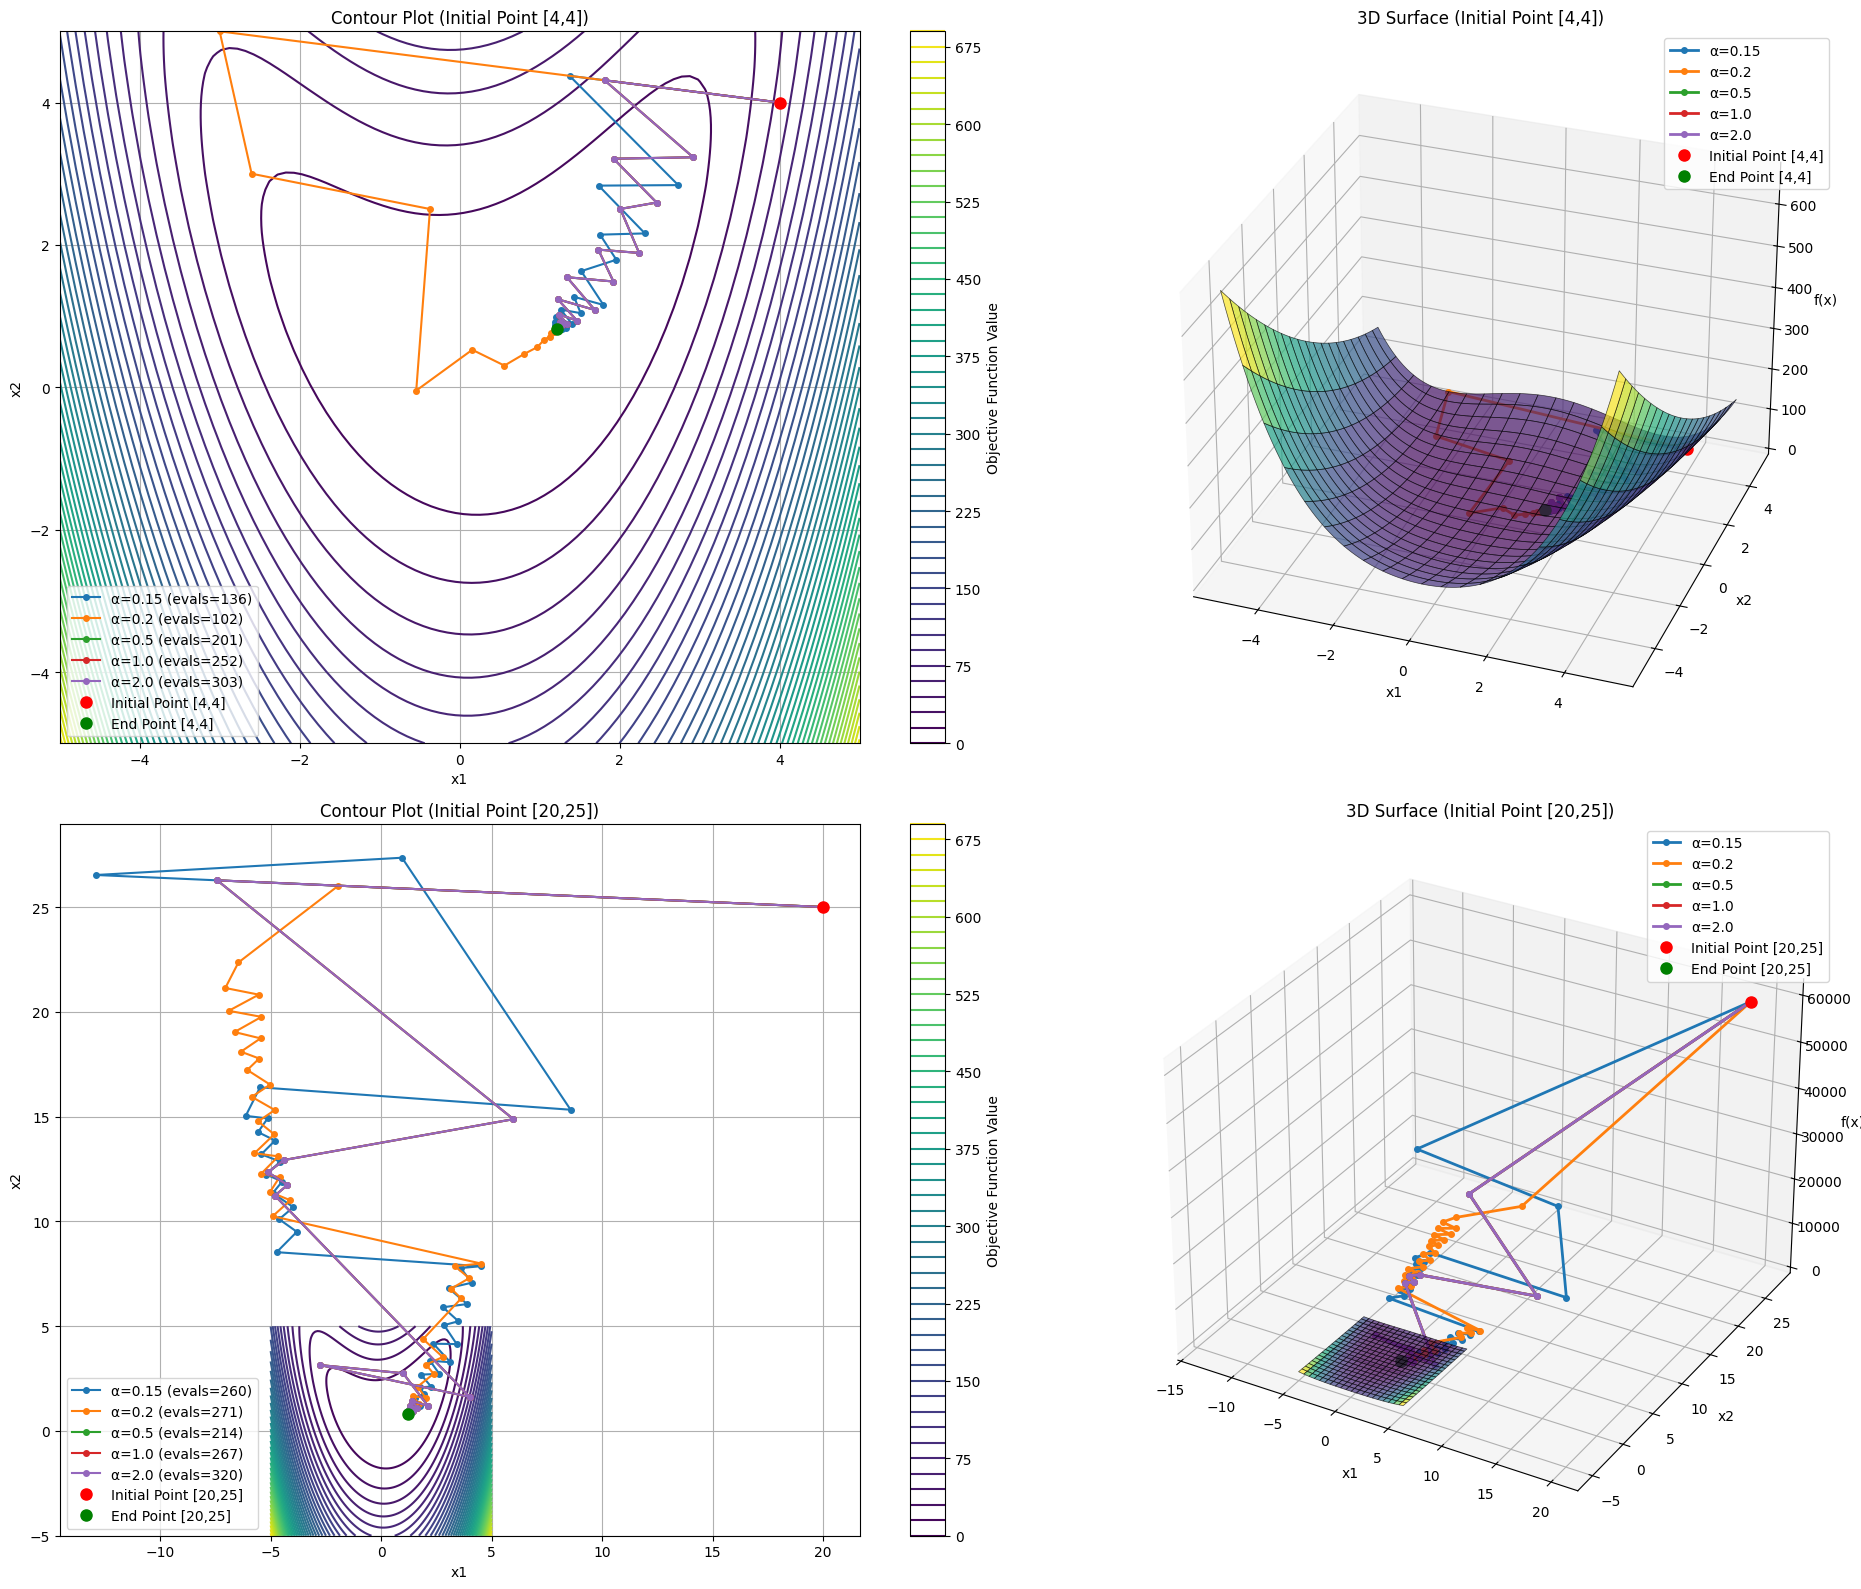

In [84]:
# Plot contour dan 3D surface
plt.figure(figsize=(20, 16))

# 1. Contour plot untuk [4,4] pada semua alpha
ax1 = plt.subplot(2, 2, 1)
contour = ax1.contour(X1, X2, Z, levels=50, cmap=cm.viridis)
plt.colorbar(contour, ax=ax1, label='Objective Function Value')
ax1.set_title('Contour Plot (Initial Point [4,4])')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
for j, alpha in enumerate(alpha_list):
    history = np.array(results[(0, j)]['history'])
    ax1.plot(history[:, 0], history[:, 1], marker='o', markersize=4, 
             label=f'α={alpha} (evals={results[(0,j)]["fevals"]})')
ax1.plot(4, 4, 'ro', markersize=8, label='Initial Point [4,4]')
# Tampilkan akhir titik
ax1.plot(results[(0, 0)]['x_min'][0], results[(0, 0)]['x_min'][1], 'go', markersize=8, label='End Point [4,4]')
ax1.legend()
ax1.grid()

# 2. 3D surface plot untuk [4,4] pada semua alpha
ax2 = plt.subplot(2, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Z, cmap=cm.viridis, alpha=0.7, 
                rstride=5, cstride=5, linewidth=0.5, edgecolor='k')
ax2.set_title('3D Surface (Initial Point [4,4])')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('f(x)')
for j, alpha in enumerate(alpha_list):
    history = np.array(results[(0, j)]['history'])
    ax2.plot(history[:, 0], history[:, 1], [objective_function(p) for p in history],
            marker='o', markersize=4, linewidth=2, label=f'α={alpha}')
ax2.plot(4, 4, objective_function([4, 4]), 'ro', markersize=8, label='Initial Point [4,4]')
# Tampilkan akhir titik
ax2.plot(results[(0, 0)]['x_min'][0], results[(0, 0)]['x_min'][1],
         objective_function(results[(0, 0)]['x_min']), 'go', markersize=8, label='End Point [4,4]')
# Rotasi gambar visualisasi
ax2.view_init(elev=30, azim=-70)
ax2.legend()

# 3. Contour plot untuk [20,25] pada semua alpha
ax3 = plt.subplot(2, 2, 3)
contour = ax3.contour(X1, X2, Z, levels=50, cmap=cm.viridis)
plt.colorbar(contour, ax=ax3, label='Objective Function Value')
ax3.set_title('Contour Plot (Initial Point [20,25])')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
for j, alpha in enumerate(alpha_list):
    history = np.array(results[(1, j)]['history'])
    ax3.plot(history[:, 0], history[:, 1], marker='o', markersize=4,
             label=f'α={alpha} (evals={results[(1,j)]["fevals"]})')
ax3.plot(20, 25, 'ro', markersize=8, label='Initial Point [20,25]')
# Tampilkan akhir titik
ax3.plot(results[(1, 0)]['x_min'][0], results[(1, 0)]['x_min'][1], 'go', markersize=8, label='End Point [20,25]')
ax3.legend()
ax3.grid()

# 4. 3D surface plot untuk [20,25] pada semua alpha
ax4 = plt.subplot(2, 2, 4, projection='3d')
ax4.plot_surface(X1, X2, Z, cmap=cm.viridis, alpha=0.7,
                rstride=5, cstride=5, linewidth=0.5, edgecolor='k')
ax4.set_title('3D Surface (Initial Point [20,25])')
ax4.set_xlabel('x1')
ax4.set_ylabel('x2')
ax4.set_zlabel('f(x)')
for j, alpha in enumerate(alpha_list):
    history = np.array(results[(1, j)]['history'])
    ax4.plot(history[:, 0], history[:, 1], [objective_function(p) for p in history],
            marker='o', markersize=4, linewidth=2, label=f'α={alpha}')
ax4.plot(20, 25, objective_function([20, 25]), 'ro', markersize=8, label='Initial Point [20,25]')   
# Tampilkan akhir titik
ax4.plot(results[(1, 0)]['x_min'][0], results[(1, 0)]['x_min'][1],
         objective_function(results[(1, 0)]['x_min']), 'go', markersize=8, label='End Point [20,25]')
ax4.legend()

plt.tight_layout()
plt.show()

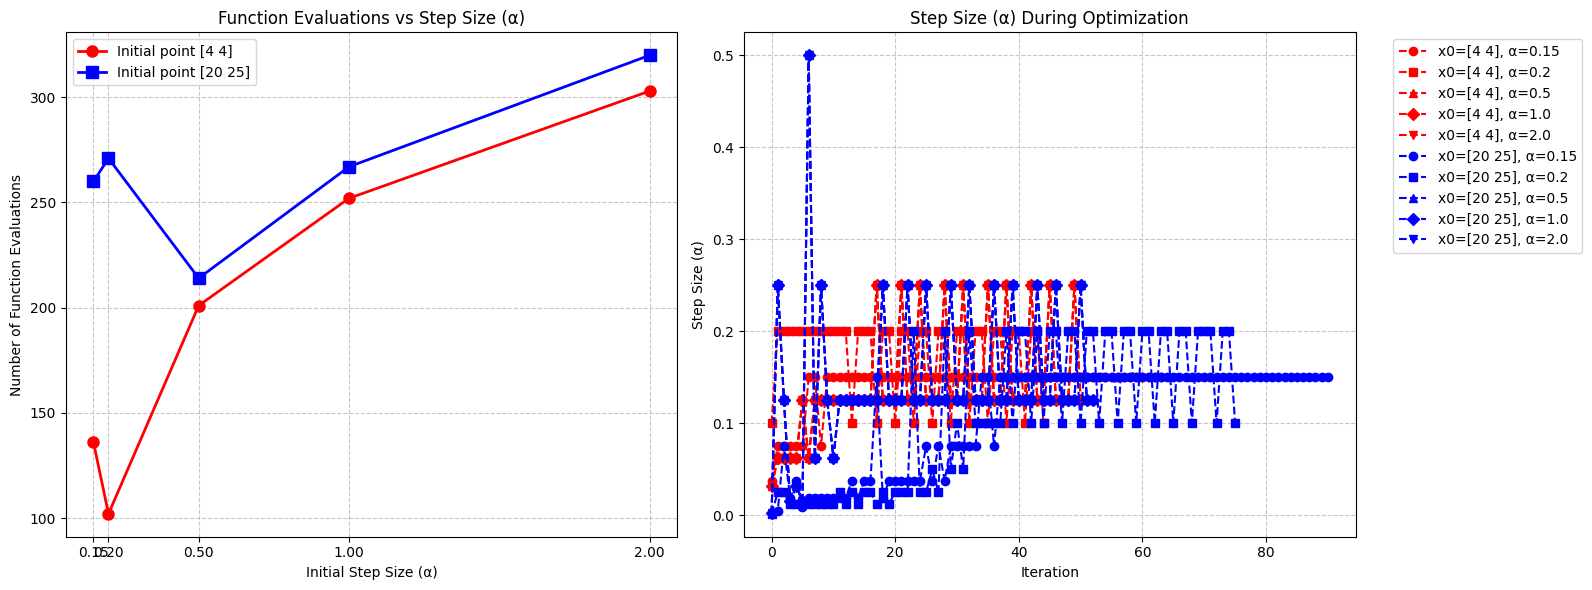

In [85]:
# Plot perbedaan antara function evaluations dan step sizes
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 2, 1)
markers = ['o', 's', '^', 'D', 'v']
colors = ['r', 'b']

for i, x0 in enumerate(x0_list):
    fevals_list = []
    for j, alpha in enumerate(alpha_list):
        fevals_list.append(results[(i, j)]['fevals'])
    ax1.plot(alpha_list, fevals_list, 
             marker=markers[i], 
             color=colors[i], 
             linestyle='-',
             linewidth=2,
             markersize=8,
             label=f'Initial point {x0}')
    
ax1.set_title('Function Evaluations vs Step Size (α)', fontsize=12)
ax1.set_xlabel('Initial Step Size (α)', fontsize=10)
ax1.set_ylabel('Number of Function Evaluations', fontsize=10)
ax1.legend(fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(alpha_list)

# Step size selama melakukan optimasi
ax2 = plt.subplot(1, 2, 2)
for i, x0 in enumerate(x0_list):
    for j, alpha in enumerate(alpha_list[:6]): 
        alphas = results[(i, j)]['alphas']
        label = f'x0={x0}, α={alpha}'
        ax2.plot(range(len(alphas)), alphas, 
                marker=markers[j], 
                color=colors[i], 
                linestyle='--', 
                linewidth=1.5,
                markersize=6,
                label=label)
    
ax2.set_title('Step Size (α) During Optimization', fontsize=12)
ax2.set_xlabel('Iteration', fontsize=10)
ax2.set_ylabel('Step Size (α)', fontsize=10)
ax2.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


================================================================= Line Search for Q3 =================================================================
Initial point: x = [4. 4.], f(x) = 50.000
Gradient: ∇f(x) = [ 70. -10.]
Search direction: p = [-70.  10.]

+--------+-------------+-----------------+-------------+---------------------------------+--------------+--------------------------------+-------------+
|  Step  |  α (alpha)  |      x_new      |  f(x_new)   |  Armijo Condition (LHS <= RHS)  |  Armijo OK?  |  Wolfe Condition (LHS >= RHS)  |  Wolfe OK?  |
+========+=============+=================+=============+=================================+==============+================================+=============+
|   0    |      1      | [-66.00, 14.00] | 9.37045e+06 |      9370450.000 <= 49.500      |      ✗       |   39913800.000 >= -2500.000    |      ✓      |
+--------+-------------+-----------------+-------------+---------------------------------+--------------+------------------------

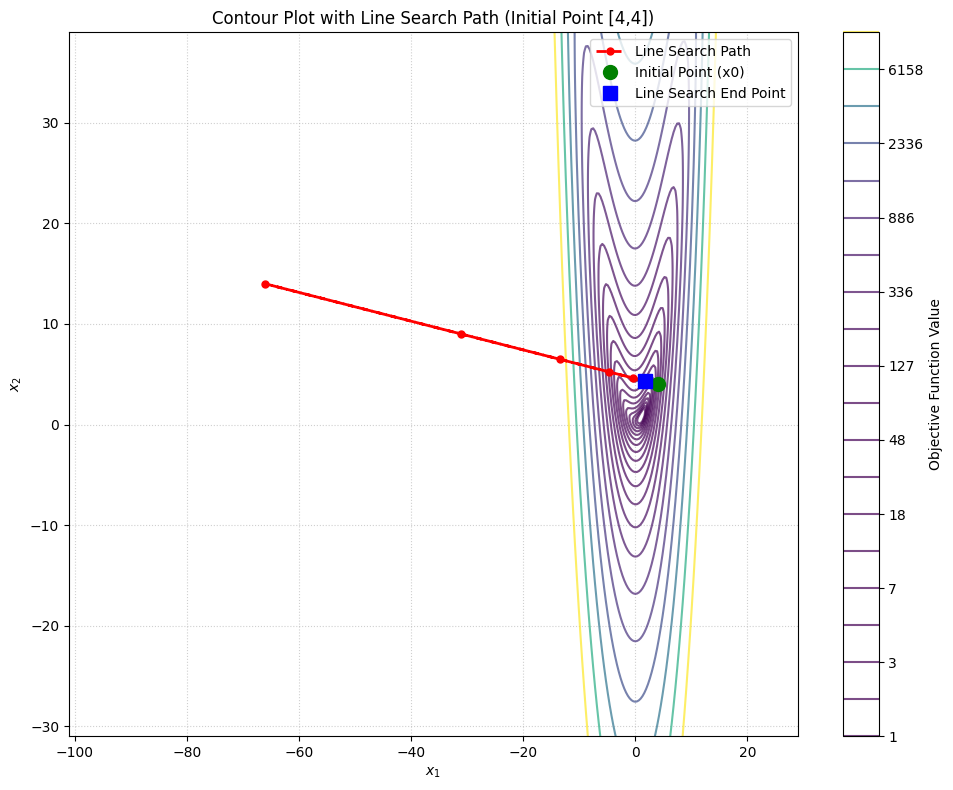

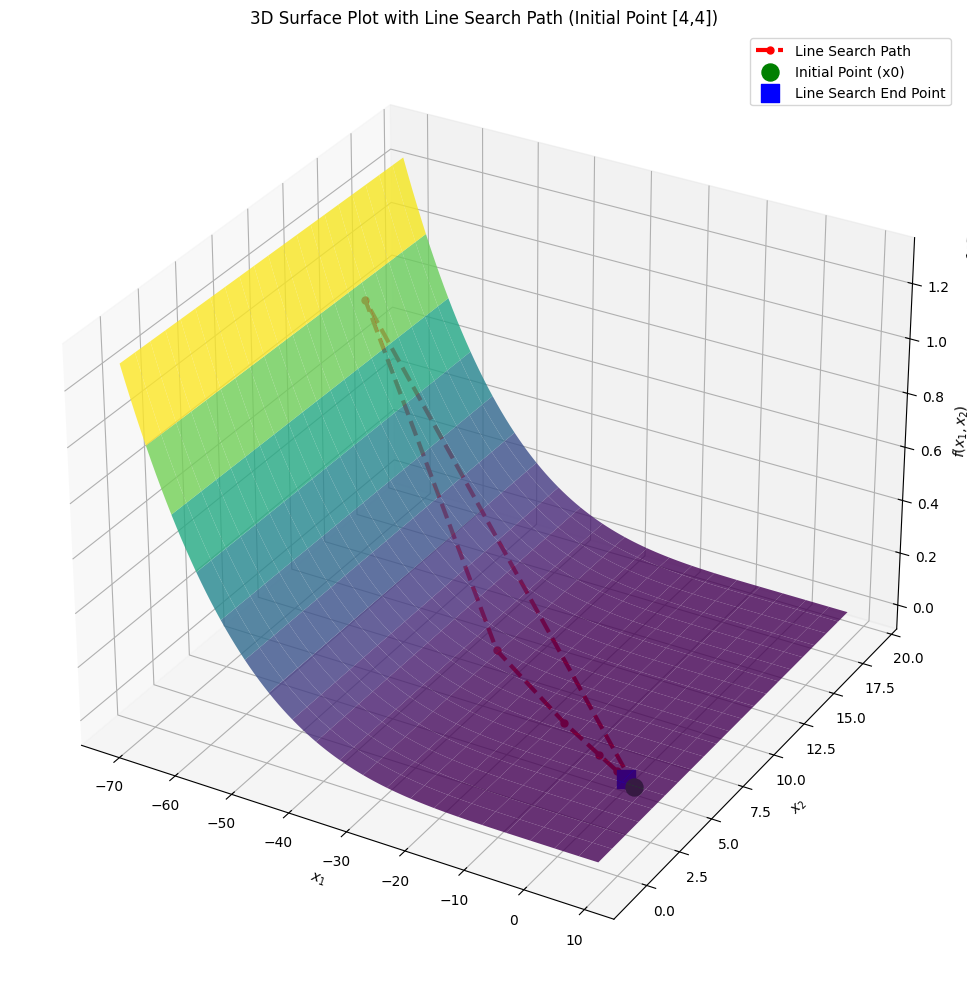

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

# Mendefinisi fungsi objek
def objective_function(x):
    x1, x2 = x
    term1 = (1 - x1)**2
    term2 = (1 - x2)**2
    term3 = 0.5 * (2*x2 - x1**2)**2
    return term1 + term2 + term3

# Mendefinisikan gradien dari fungsi objek
def gradient(x):
    x1, x2 = x
    df_dx1 = -2*(1 - x1) - 2*x1*(2*x2 - x1**2)
    df_dx2 = -2*(1 - x2) + 2*(2*x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Algoritma Steepest Descent
def line_search_demo(x0, alpha=1.0, c1=1e-4, c2=0.5):
    x = np.array(x0, dtype=float)
    grad = gradient(x)
    p = -grad  # Search direction (negative gradient)
    fx = objective_function(x)
    
    print(f"Initial point: x = {x}, f(x) = {fx:.3f}")
    print(f"Gradient: ∇f(x) = {grad}")
    print(f"Search direction: p = {p}\n")

    alpha_current = alpha
    table_data = []
    
    # Definisi variabel untuk menyimpan titik-titik line search
    line_search_points = [x]

    for i in range(15):  # Max 15 backtracking steps
        x_new = x + alpha_current * p
        fx_new = objective_function(x_new)
        grad_new = gradient(x_new)
        
        # Add the new point to the list for plotting
        line_search_points.append(x_new)

        # Armijo Condition (sufficient decrease)
        armijo_lhs = fx_new
        armijo_rhs = fx + c1 * alpha_current * np.dot(grad, p)
        armijo_ok = armijo_lhs <= armijo_rhs
        
        # Wolfe Condition (sufficient curvature)
        # Using the user's provided logic for `wolfe_ok` calculation.
        wolfe_lhs_display = np.dot(grad_new, p)
        wolfe_rhs_display = c2 * np.dot(grad, p)
        wolfe_ok = wolfe_lhs_display >= wolfe_rhs_display

        table_data.append([
            i,
            f"{alpha_current:.5f}", # More precision for alpha
            f"[{x_new[0]:.2f}, {x_new[1]:.2f}]", # Format coordinates for display
            f"{fx_new:.3f}",
            f"{armijo_lhs:.3f} <= {armijo_rhs:.3f}",
            "✓" if armijo_ok else "✗",
            f"{wolfe_lhs_display:.3f} >= {wolfe_rhs_display:.3f}",
            "✓" if wolfe_ok else "✗"
        ])
        
        # Break if both conditions are met
        if armijo_ok and wolfe_ok:
            break
        else:
            alpha_current *= 0.5 # Reduce alpha for backtracking

    # Initialize table headers
    headers = [
        "Step", 
        "α (alpha)", 
        "x_new", 
        "f(x_new)", 
        "Armijo Condition (LHS <= RHS)", 
        "Armijo OK?", 
        "Wolfe Condition (LHS >= RHS)",
        "Wolfe OK?"
    ]

    # Center alignment for columns
    colalign = ["center"] * len(headers)
    print(tabulate(table_data, headers=headers, tablefmt="grid", colalign=colalign))

    # Print results
    if armijo_ok and wolfe_ok:
        print("\n" + " Line search converged! ".center(125, '='))
        print(f" Final α = {alpha_current:.5f} ".center(125))
        print(f" x_new = [{x_new[0]:.2f}, {x_new[1]:.2f}] ".center(125))
        print(f" f(x_new) = {fx_new:.3f} ".center(125))
    else:
        print("\n" + " Line search failed to converge in 15 steps ".center(125, '!'))
    
    return np.array(line_search_points), x_new # Return points for plotting

# --- Plotting the Contour ---
def plot_contour_and_line_search(line_search_points, final_x_new, x0):
    # Define bounds for the plot based on the initial point and search path
    # Ensure a reasonable range for visibility
    all_x1 = np.concatenate(([x0[0]], line_search_points[:, 0]))
    all_x2 = np.concatenate(([x0[1]], line_search_points[:, 1]))

    x1_min_plot, x1_max_plot = all_x1.min() - 35, all_x1.max() + 25
    x2_min_plot, x2_max_plot = all_x2.min() - 35, all_x2.max() + 25

    x1_range = np.linspace(x1_min_plot, x1_max_plot, 400)
    x2_range = np.linspace(x2_min_plot, x2_max_plot, 400)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = objective_function(np.array([X1, X2]))

    plt.figure(figsize=(10, 8))
    contour = plt.contour(X1, X2, Z, levels=np.logspace(0, 4, 20), cmap='viridis', alpha=0.7)
    plt.colorbar(contour, label='Objective Function Value')
    
    # Plot the line search path
    path_x = line_search_points[:, 0]
    path_y = line_search_points[:, 1]
    plt.plot(path_x, path_y, 'o--', color='red', markersize=5, linewidth=2, label='Line Search Path')
    
    # Mark initial and final points
    plt.plot(x0[0], x0[1], 'go', markersize=10, label='Initial Point (x0)')
    plt.plot(final_x_new[0], final_x_new[1], 'bs', markersize=10, label='Line Search End Point')

    plt.title('Contour Plot with Line Search Path (Initial Point [4,4])')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Plotting the 3D Surface ---
def plot_3d_surface(line_search_points, final_x_new, x0):
    """
    Generates a 3D surface plot of the objective function and overlays
    the line search path.
    """
    # Define bounds for the plot based on the initial point and search path
    all_x1 = np.concatenate(([x0[0]], line_search_points[:, 0]))
    all_x2 = np.concatenate(([x0[1]], line_search_points[:, 1]))

    x1_min_plot, x1_max_plot = all_x1.min() - 5, all_x1.max() + 5
    x2_min_plot, x2_max_plot = all_x2.min() - 5, all_x2.max() + 5

    x1_range = np.linspace(x1_min_plot, x1_max_plot, 100)
    x2_range = np.linspace(x2_min_plot, x2_max_plot, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = objective_function(np.array([X1, X2]))

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8, rstride=5, cstride=5)

    # Plot the line search path in 3D
    path_x = line_search_points[:, 0]
    path_y = line_search_points[:, 1]
    path_z = objective_function(line_search_points.T) # Calculate Z values for each point in path
    ax.plot(path_x, path_y, path_z, 'o--', color='red', markersize=5, linewidth=3, label='Line Search Path')
    
    # Mark initial and final points in 3D
    ax.scatter(x0[0], x0[1], objective_function(x0), color='green', marker='o', s=150, label='Initial Point (x0)')
    ax.scatter(final_x_new[0], final_x_new[1], objective_function(final_x_new), color='blue', marker='s', s=150, label='Line Search End Point')

    ax.set_title('3D Surface Plot with Line Search Path (Initial Point [4,4])')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$f(x_1, x_2)$')
    ax.legend()
    plt.tight_layout()
    plt.show()

# --- Menjalankan code ---
if __name__ == "__main__":
    print("\n" + " Line Search for Q3 ".center(150, '='))
    # Menjalankan code line search untuk titik awal [4, 4]
    line_search_path_points, final_point = line_search_demo(x0=[4, 4], alpha=1.0)

    # Plot contour dengan path line search
    plot_contour_and_line_search(line_search_path_points, final_point, x0=[4,4])

    # Plot 3D surface dengan path line search
    plot_3d_surface(line_search_path_points, final_point, x0=[4,4])
